In [67]:
import torch
import matplotlib.pyplot as plt

In [68]:
loaded_state_dict = torch.load('/home/noahfang/Documents/Lab/AIRL_with_progress/replayed_traj/reward_memo.pt')
loaded_reward_dict = torch.load('/home/noahfang/Documents/Lab/AIRL_with_progress/replayed_traj/reward_memo.pt')
loaded_reward_dict = {k: v for k, v in loaded_reward_dict.items() if v}
loaded_state_dict = {k: v for k, v in loaded_state_dict.items() if v}

In [64]:
# 计算每个键的总reward
total_rewards_per_key = {key: sum(rewards) for key, rewards in loaded_reward_dict.items()}
# 计算所有键的总reward平均值
average_total_reward = sum(total_rewards_per_key.values()) / len(total_rewards_per_key)

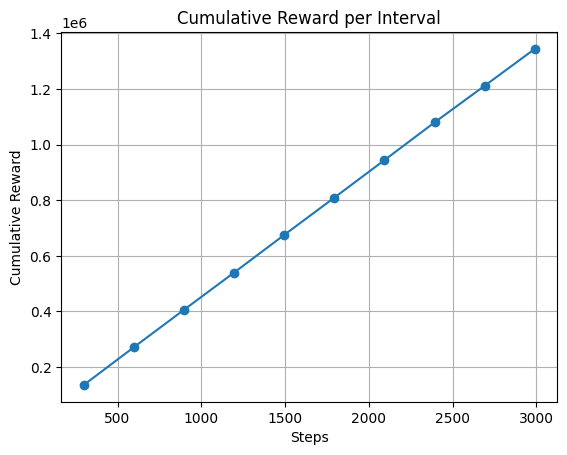

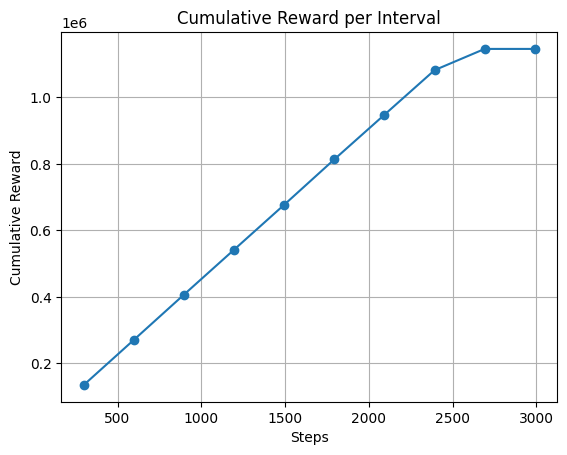

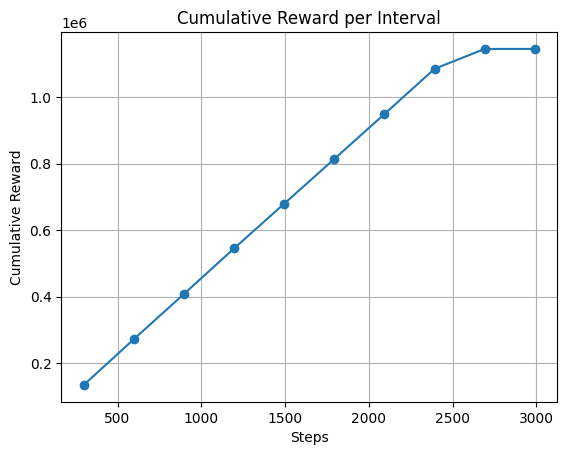

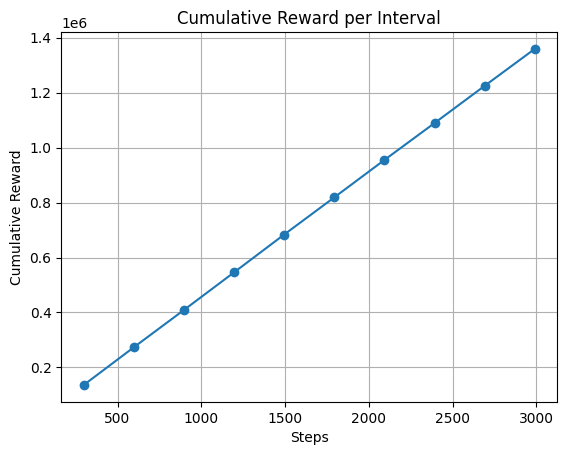

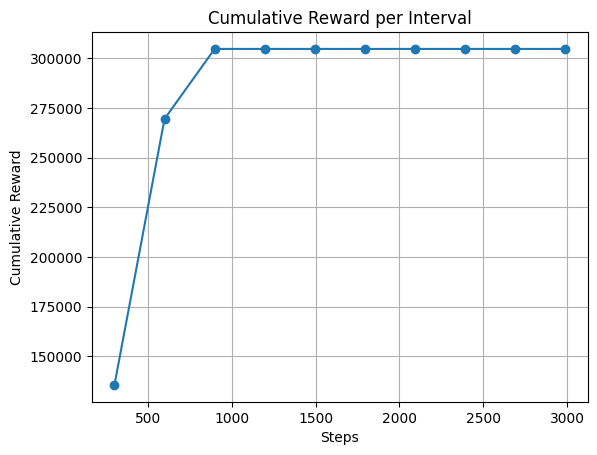

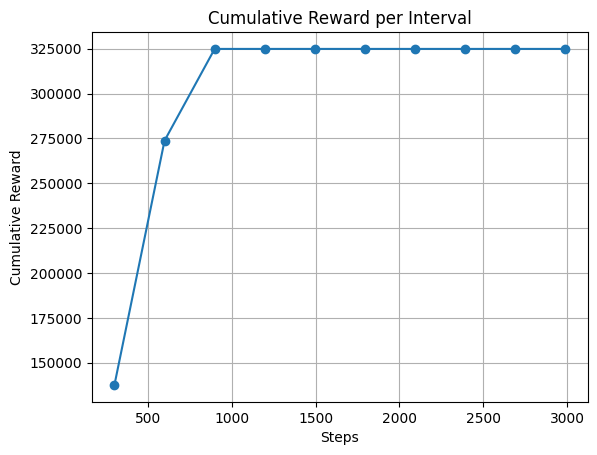

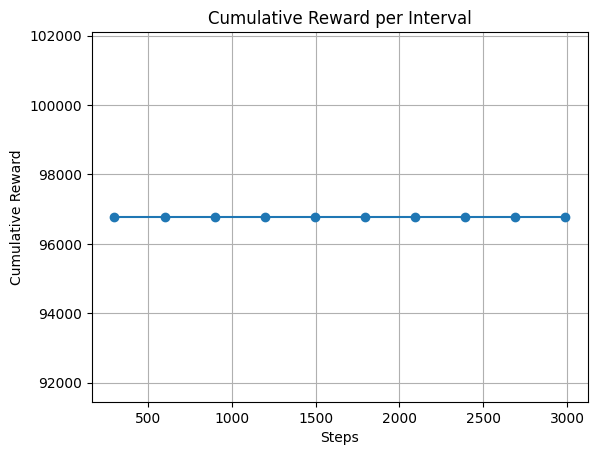

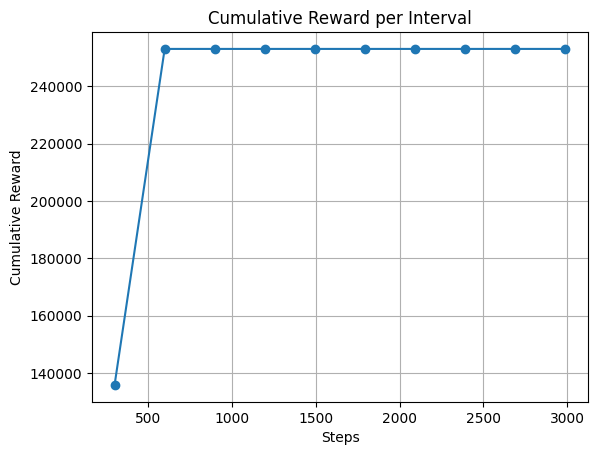

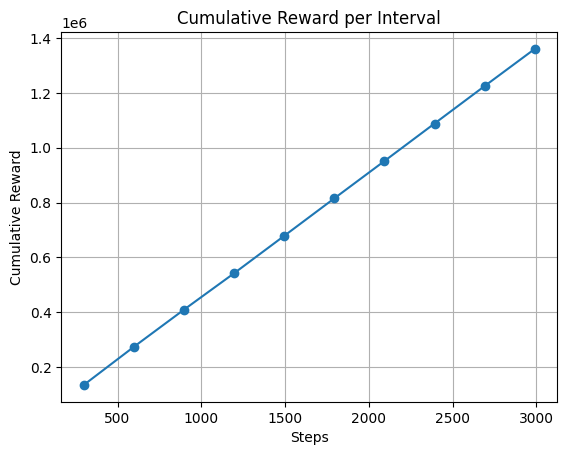

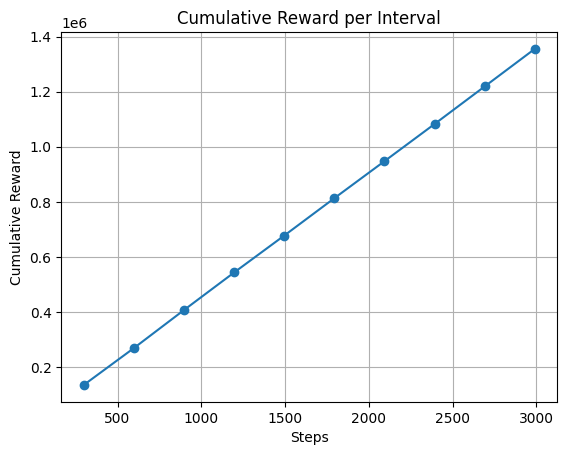

In [70]:
for key in loaded_reward_dict:
    # 计算每个size/10的reward总和
    total_length = len(loaded_reward_dict[key].values()) # 获取任意一个reward列表的长度
    size = total_length // 10  # 计算每个区间的大小
    cumulative_rewards = [0] * 10  # 初始化累计奖励列表
    # 累计计算每个区间的reward总和
    for i in range(10):
        interval_sum = 0
        # 对于每个键，计算该区间内的reward总和
        interval_sum += sum(loaded_reward_dict[key][i*size:(i+1)*size])
        cumulative_rewards[i] = interval_sum if i == 0 else cumulative_rewards[i-1] + interval_sum
    # 设置图形的横纵坐标值
    intervals = [(i+1) * size for i in range(10)]
    # cumulative_rewards = [cumulative_rewards[i]/average_total_reward * 100 for i in range(10)]
    cumulative_rewards = [cumulative_rewards[i] * 100 for i in range(10)]
    # 画图
    plt.plot(intervals, cumulative_rewards, marker='o')
    plt.title('Cumulative Reward per Interval')
    plt.xlabel('Steps')
    plt.ylabel('Cumulative Reward')
    plt.grid(True)
    plt.show()
